In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df=pd.read_csv('/content/processed_task_management_dataset.csv')
df.head()

,Task,Category,Priority,Deadline,Assigned_To,User_Behavior_Score,Status,Workload,Processed_Task
0,Write guide for the engineer_magnetic_solution...,Documentation,Low,2025-05-21,Preet,0.84,Completed,High,write guide engineermagneticsolutions wednesday
1,Investigate the seize_cross-platform_partnersh...,Research,Medium,2025-05-22,Naman,0.50,Completed,Medium,investigate seizecrossplatformpartnerships thu...
2,Implement the unleash_sticky_schemas before Tu...,Feature,High,2025-06-03,Bibhab,0.59,Completed,Low,implement unleashstickyschemas tuesday
3,Develop the transform_cross-media_markets befo...,Feature,Medium,2025-05-22,Smit,0.67,Pending,Medium,develop transformcrossmediamarkets thursday
4,Create the drive_dot-com_methodologies before ...,Feature,Medium,2025-05-25,Smit,0.67,Pending,Medium,create drivedotcommethodologies sunday


Week 2 :
1. Feature Extraction with TF-IDF

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the cleaned task descriptions
texts = df["Processed_Task"]
labels = df["Category"]

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(texts)


2. Train/Test Split and Classifier Training

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes Results:\n", classification_report(y_test, nb_preds))

# SVM model
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM Results:\n", classification_report(y_test, svm_preds))


Naive Bayes Results:
                precision    recall  f1-score   support

          Bug       1.00      1.00      1.00        48
  Code Review       0.82      0.97      0.89        34
   Deployment       1.00      1.00      1.00        40
       Design       1.00      1.00      1.00        39
Documentation       0.89      1.00      0.94        32
      Feature       1.00      0.89      0.94        38
  Maintenance       1.00      1.00      1.00        36
 Optimization       0.97      0.88      0.92        41
     Research       1.00      0.96      0.98        46
      Testing       1.00      1.00      1.00        46

     accuracy                           0.97       400
    macro avg       0.97      0.97      0.97       400
 weighted avg       0.97      0.97      0.97       400

SVM Results:
                precision    recall  f1-score   support

          Bug       1.00      1.00      1.00        48
  Code Review       0.84      0.94      0.89        34
   Deployment       1.00 

Week 3 :
1. Priority Prediction Model using Random Forest

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode Priority labels
le_priority = LabelEncoder()
df["Priority_Label"] = le_priority.fit_transform(df["Priority"])

# TF-IDF features from Processed_Task
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df["Processed_Task"])
y = df["Priority_Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print("Random Forest - Priority Prediction Report:\n")
print(classification_report(y_test, y_pred, target_names=le_priority.classes_))


Random Forest - Priority Prediction Report:

              precision    recall  f1-score   support

        High       0.52      0.75      0.62       202
         Low       0.27      0.17      0.21        63
      Medium       0.35      0.18      0.24       135

    accuracy                           0.47       400
   macro avg       0.38      0.37      0.35       400
weighted avg       0.42      0.47      0.42       400



2. GridSearchCV for Hyperparameter Tuning

In [6]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Accuracy Score: 0.49187460327498694


3. Workload Balancing Logic (Simple Heuristic)

In [9]:
# Count tasks per user
task_counts = df["Assigned_To"].value_counts()

# Assign new tasks to users with the least workload
def assign_task_least_loaded(user_task_counts):
    return user_task_counts.idxmin()

new_assignment = assign_task_least_loaded(task_counts)
print("Assign next task to:", new_assignment)


Assign next task to: Aarav


Week 4 :
1. Finalize Models for Task Classification & Priority Prediction

In [10]:
import joblib

joblib.dump(svm_model, "task_classifier_model.pkl")

joblib.dump(rf_model, "priority_predictor_model.pkl")

joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


['tfidf_vectorizer.pkl']

2. Prepare Dashboard Mockup / Output Summary

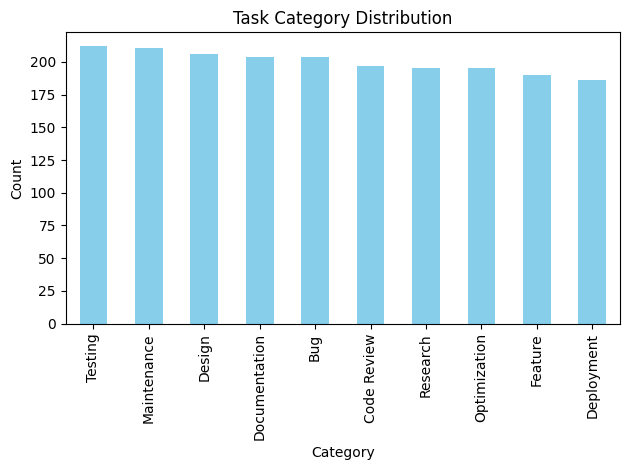

In [11]:
import matplotlib.pyplot as plt

df['Category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Task Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


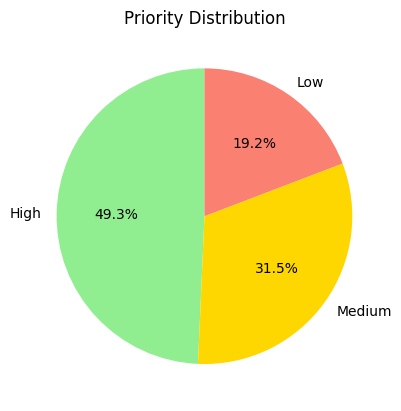

In [12]:
df['Priority'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold', 'salmon'])
plt.title('Priority Distribution')
plt.ylabel('')
plt.show()


3. Compile Performance Metrics

In [13]:
# Task classification performance
print("Final Task Classification Report:\n")
print(classification_report(y_test, svm_preds))

# Priority prediction performance
print("Final Priority Prediction Report:\n")
print(classification_report(y_test_p, rf_preds, target_names=le_priority.classes_))
